In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.getcwd())

g:\DIYguru\Data-Science-and-Engineering-Analytics\Projects\Main_Project_ML\EV Charging Patterns


In [3]:
'''
Created a function 'load_data_excel' to load excel into python
'''

import pandas as pd
import numpy as np
import os

def load_data_csv(file_path):
    """
    Load data from an csv file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_csv(file_path)
    return df



In [4]:
# https://www.kaggle.com/datasets/datasetengineer/ev-charging-station-data-california-region?utm_source=chatgpt.com

#df1 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_A_Calif.csv")
df1 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_B__Calif.csv")
df2 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_C__Calif.csv")

In [5]:
# concatenate the dataframes
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
'''
Checked unique values in both the dataframe
'''

for i in df.columns:
    print(f"Unique values in column '{i}':")
    print(df[i].unique(),"\n")

Unique values in column 'Date':
['2021-01-01' '2021-01-02' '2021-01-03' ... '2024-05-29' '2024-05-30'
 '2024-05-31'] 

Unique values in column 'Time':
['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00'] 

Unique values in column 'EV Charging Demand (kW)':
[0.11236204 0.28521429 0.21959818 ... 0.23297838 0.07779743 0.2481701 ] 

Unique values in column 'Solar Energy Production (kW)':
[0.12538804 0.05269671 0.10503542 ... 0.04761178 0.05229399 0.00880412] 

Unique values in column 'Wind Energy Production (kW)':
[0.00910519 0.10758936 0.0439957  ... 0.13834387 0.27850439 0.18543791] 

Unique values in column 'Electricity Price ($/kWh)':
[0.13731049 0.12510459 0.10666085 ... 0.1780538  0.17047302 0.10660294] 

Unique values in column 'Grid Availability':
['Available' 'Unavaila

In [7]:
# fix date format for date column Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59810 entries, 0 to 59809
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    59810 non-null  datetime64[ns]
 1   Time                                    59810 non-null  object        
 2   EV Charging Demand (kW)                 59810 non-null  float64       
 3   Solar Energy Production (kW)            59810 non-null  float64       
 4   Wind Energy Production (kW)             59810 non-null  float64       
 5   Electricity Price ($/kWh)               59810 non-null  float64       
 6   Grid Availability                       59810 non-null  object        
 7   Weather Conditions                      59810 non-null  object        
 8   Battery Storage (kWh)                   59810 non-null  float64       
 9   Charging Station Capacity (kW)          59810 non-

In [9]:
df.head()

,Date,Time,EV Charging Demand (kW),Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Grid Availability,Weather Conditions,Battery Storage (kWh),Charging Station Capacity (kW),...,Grid Stability Index,Carbon Emissions (kgCO2/kWh),Power Outages (hours),Energy Savings ($),Total Renewable Energy Production (kW),Effective Charging Capacity (kW),Adjusted Charging Demand (kW),Net Energy Cost ($),Carbon Footprint Reduction (kgCO2),Renewable Energy Efficiency
0,2021-01-01,00:00:00,0.112362,0.125388,0.009105,0.137310,Available,Partly Cloudy,16.532408,21.763422,...,0.731147,0.274944,1.889209,4.562581,0.134493,21.181550,0.028134,0.015428,0.023158,0.006350
1,2021-01-01,01:00:00,0.285214,0.052697,0.107589,0.125105,Available,Sunny,39.106930,31.215028,...,1.494387,0.481251,0.277371,0.215104,0.160286,27.639943,0.158721,0.035682,0.060875,0.005799
2,2021-01-01,02:00:00,0.219598,0.105035,0.043996,0.106661,Available,Cloudy,6.112691,46.489116,...,1.109293,0.146079,0.642644,0.029969,0.149031,41.781150,0.175614,0.023423,0.006425,0.003567
3,2021-01-01,03:00:00,0.179598,0.073839,0.275727,0.072209,Available,Partly Cloudy,30.041088,49.675029,...,0.847219,0.475255,0.546680,1.384950,0.349567,46.078097,0.004072,0.012969,0.083420,0.007586
4,2021-01-01,04:00:00,0.046806,0.068614,0.059824,0.091090,Available,Partly Cloudy,45.085422,21.166182,...,1.452466,0.319261,1.935850,1.872170,0.128438,17.733986,0.045315,0.004264,0.000476,0.007242


In [10]:
df_charging_efficiency = df.groupby(df['Date'].dt.to_period('M'))['EV Charging Efficiency (%)'].mean().reset_index()
df_charging_efficiency

,Date,EV Charging Efficiency (%)
0,2021-01,89.958806
1,2021-02,90.056477
2,2021-03,90.175206
3,2021-04,89.981847
4,2021-05,90.069777
5,2021-06,89.442198
6,2021-07,89.931319
7,2021-08,90.345421
8,2021-09,90.017416
9,2021-10,90.166764


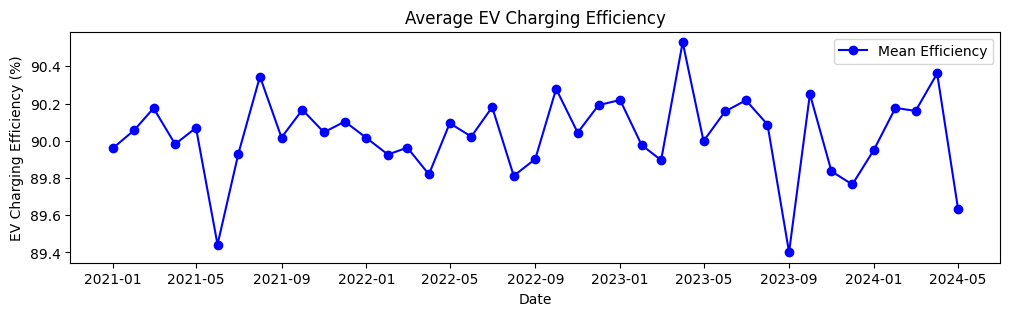

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(df_charging_efficiency['Date'].dt.to_timestamp(), df_charging_efficiency['EV Charging Efficiency (%)'], color='blue', marker='o', label='Mean Efficiency')
plt.title('Average EV Charging Efficiency')
plt.xlabel('Date')
plt.ylabel('EV Charging Efficiency (%)')
plt.legend()
plt.show()

In [12]:
df['Weather Conditions'].unique()

array(['Partly Cloudy', 'Sunny', 'Cloudy', 'Clear', 'Rainy'], dtype=object)

In [13]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'

df_weather = df.groupby([df['Date'].dt.to_period('M'),'Weather Conditions'])['EV Charging Efficiency (%)'].mean().reset_index()
df_weather

,Date,Weather Conditions,EV Charging Efficiency (%)
0,2021-01,Clear,89.152133
1,2021-01,Cloudy,90.573190
2,2021-01,Partly Cloudy,89.766215
3,2021-01,Rainy,89.696676
4,2021-01,Sunny,90.589128
...,...,...,...
200,2024-05,Clear,89.773079
201,2024-05,Cloudy,89.090572
202,2024-05,Partly Cloudy,89.451986
203,2024-05,Rainy,89.995265


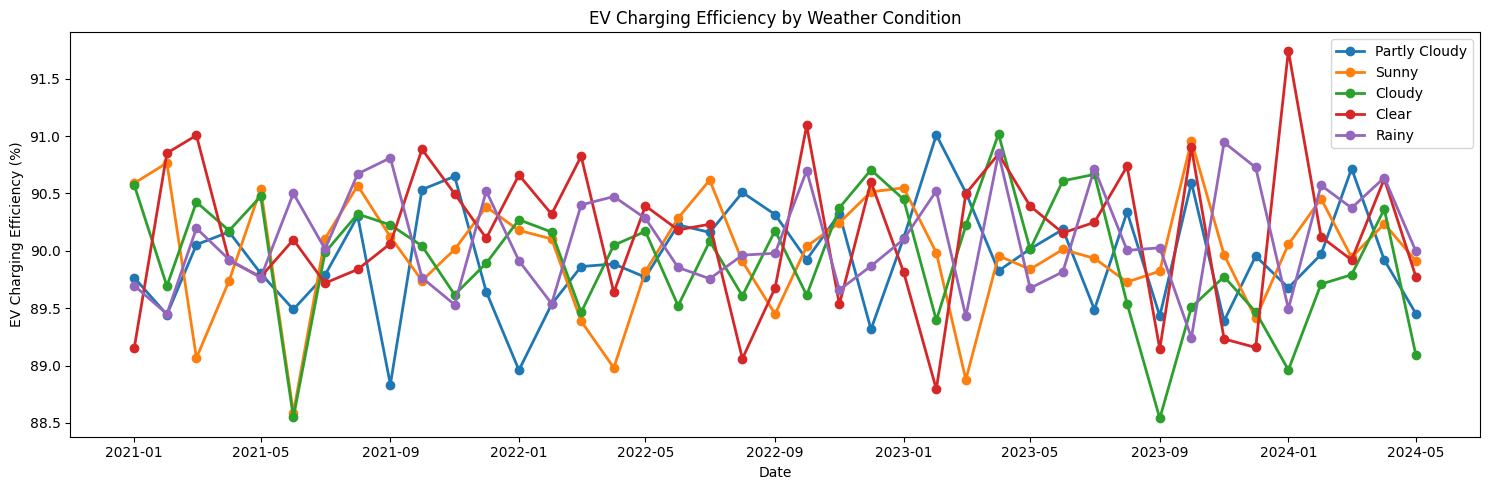

In [14]:
import matplotlib.pyplot as plt

# List of weather conditions to plot
weather_conditions = ['Partly Cloudy', 'Sunny', 'Cloudy', 'Clear', 'Rainy']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each weather condition on the same axes
for i in weather_conditions:
    condition_df = df_weather[df_weather['Weather Conditions'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['EV Charging Efficiency (%)'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Charging Efficiency by Weather Condition')
plt.xlabel('Date')
plt.ylabel('EV Charging Efficiency (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Convert 'Time' column to datetime and extract hour
hours = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Map hour to part of day with non-ordered labels
df['Day Period'] = pd.cut(
    hours,
    bins=[-1, 3, 11, 16, 20, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
    include_lowest=True,
    ordered=False
)

In [16]:
df['Day Period'].unique()

['Night', 'Morning', 'Afternoon', 'Evening']
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [17]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['EV Charging Demand (kW)'].mean().reset_index()
df_period

,Date,Day Period,EV Charging Demand (kW)
0,2021-01,Afternoon,0.150594
1,2021-01,Evening,0.149428
2,2021-01,Morning,0.146796
3,2021-01,Night,0.147207
4,2021-02,Afternoon,0.142247
...,...,...,...
159,2024-04,Night,0.152574
160,2024-05,Afternoon,0.139622
161,2024-05,Evening,0.155982
162,2024-05,Morning,0.146877


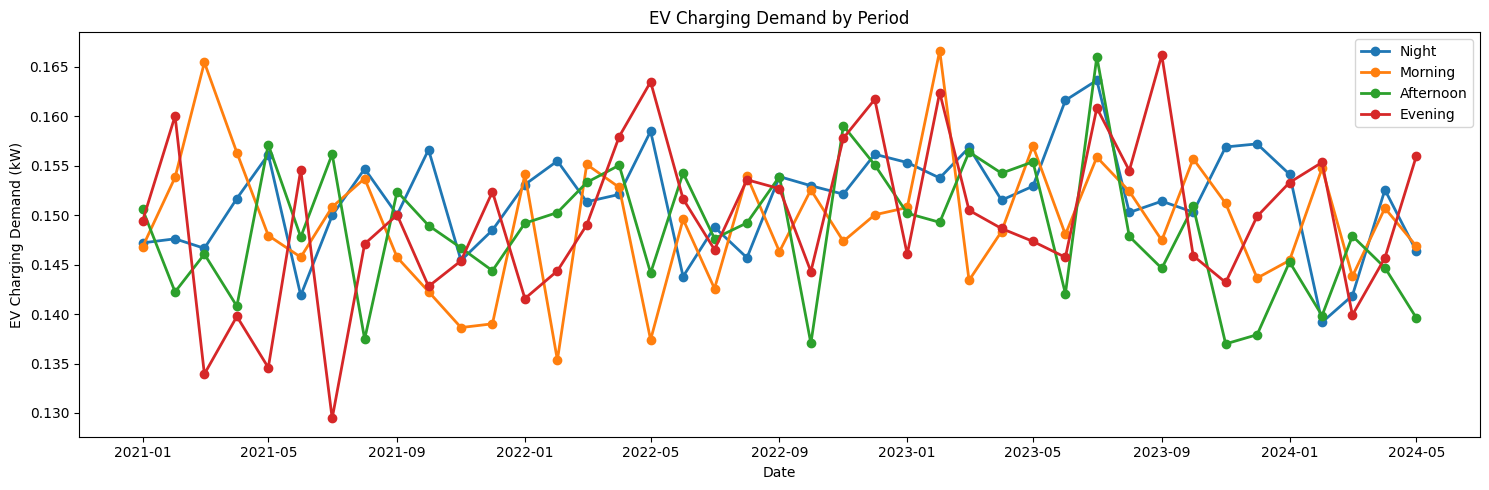

In [18]:
import matplotlib.pyplot as plt

# List of periods conditions to plot
period = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_period[df_period['Day Period'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['EV Charging Demand (kW)'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Charging Demand by Period')
plt.xlabel('Date')
plt.ylabel('EV Charging Demand (kW)')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['Total Renewable Energy Production (kW)'].mean().reset_index()
df_period

,Date,Day Period,Total Renewable Energy Production (kW)
0,2021-01,Afternoon,0.290988
1,2021-01,Evening,0.293721
2,2021-01,Morning,0.300473
3,2021-01,Night,0.296199
4,2021-02,Afternoon,0.318795
...,...,...,...
159,2024-04,Night,0.297569
160,2024-05,Afternoon,0.308193
161,2024-05,Evening,0.302174
162,2024-05,Morning,0.297947


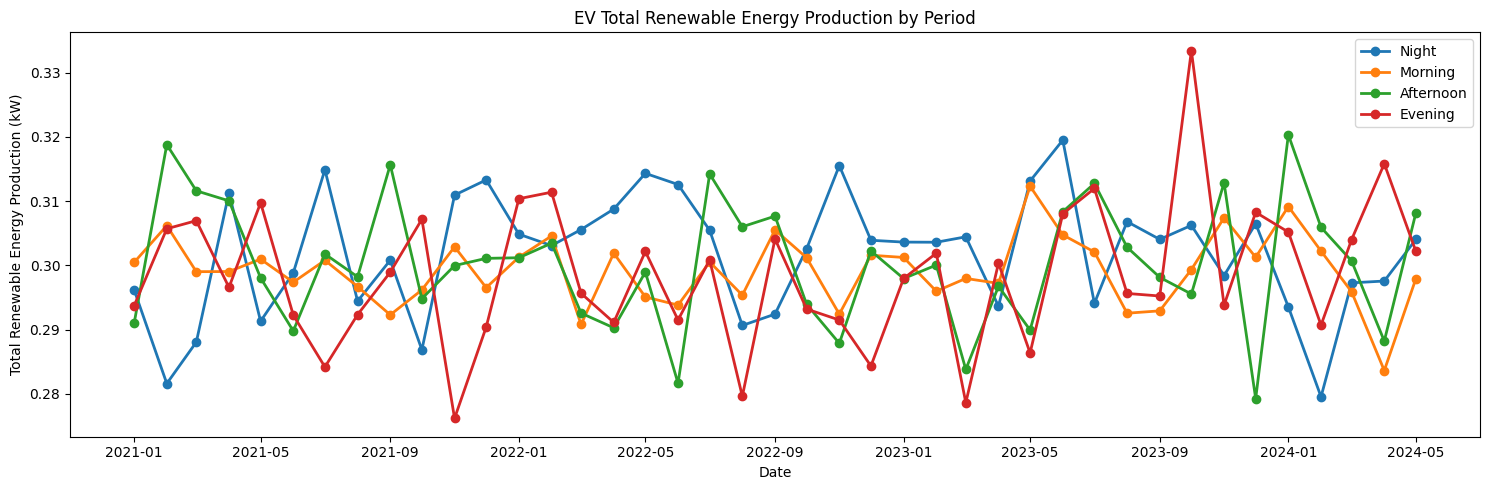

In [20]:
import matplotlib.pyplot as plt

# List of periods conditions to plot
period = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_period[df_period['Day Period'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['Total Renewable Energy Production (kW)'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Total Renewable Energy Production by Period')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy Production (kW)')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['Total Renewable Energy Production (kW)'].mean().reset_index()
df_period

,Date,Day Period,Total Renewable Energy Production (kW)
0,2021-01,Afternoon,0.290988
1,2021-01,Evening,0.293721
2,2021-01,Morning,0.300473
3,2021-01,Night,0.296199
4,2021-02,Afternoon,0.318795
...,...,...,...
159,2024-04,Night,0.297569
160,2024-05,Afternoon,0.308193
161,2024-05,Evening,0.302174
162,2024-05,Morning,0.297947


In [22]:
import pandas as pd

def add_season_column(df, date_col='Date'):
    """
    Adds a 'Season' column to the DataFrame based on the month from a date column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_col (str): The name of the column containing datetime values.

    Returns:
        pd.DataFrame: Original DataFrame with an added 'Season' column.
    """
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])

    # Map months to seasons
    df['Season'] = df[date_col].dt.month % 12 // 3
    season_map = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
    df['Season'] = df['Season'].map(season_map)

    return df


In [23]:
add_season_column(df, date_col='Date')

,Date,Time,EV Charging Demand (kW),Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Grid Availability,Weather Conditions,Battery Storage (kWh),Charging Station Capacity (kW),...,Power Outages (hours),Energy Savings ($),Total Renewable Energy Production (kW),Effective Charging Capacity (kW),Adjusted Charging Demand (kW),Net Energy Cost ($),Carbon Footprint Reduction (kgCO2),Renewable Energy Efficiency,Day Period,Season
0,2021-01-01,00:00:00,0.112362,0.125388,0.009105,0.137310,Available,Partly Cloudy,16.532408,21.763422,...,1.889209,4.562581,0.134493,21.181550,0.028134,0.015428,0.023158,0.006350,Night,Winter
1,2021-01-01,01:00:00,0.285214,0.052697,0.107589,0.125105,Available,Sunny,39.106930,31.215028,...,0.277371,0.215104,0.160286,27.639943,0.158721,0.035682,0.060875,0.005799,Night,Winter
2,2021-01-01,02:00:00,0.219598,0.105035,0.043996,0.106661,Available,Cloudy,6.112691,46.489116,...,0.642644,0.029969,0.149031,41.781150,0.175614,0.023423,0.006425,0.003567,Night,Winter
3,2021-01-01,03:00:00,0.179598,0.073839,0.275727,0.072209,Available,Partly Cloudy,30.041088,49.675029,...,0.546680,1.384950,0.349567,46.078097,0.004072,0.012969,0.083420,0.007586,Night,Winter
4,2021-01-01,04:00:00,0.046806,0.068614,0.059824,0.091090,Available,Partly Cloudy,45.085422,21.166182,...,1.935850,1.872170,0.128438,17.733986,0.045315,0.004264,0.000476,0.007242,Morning,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59805,2024-05-30,20:00:00,0.173522,0.144697,0.109528,0.137830,Available,Sunny,30.755102,49.248154,...,0.890670,1.871188,0.254225,40.756320,0.146345,0.023916,0.009767,0.006238,Evening,Spring
59806,2024-05-30,21:00:00,0.194685,0.153407,0.208440,0.171891,Available,Clear,47.379324,17.980083,...,0.960716,2.845048,0.361847,15.552974,0.156887,0.033465,0.012332,0.023265,Night,Spring
59807,2024-05-30,22:00:00,0.232978,0.047612,0.138344,0.178054,Available,Partly Cloudy,7.738819,17.604067,...,1.411035,4.405430,0.185956,14.138733,0.202289,0.041483,0.010963,0.013152,Night,Spring
59808,2024-05-30,23:00:00,0.077797,0.052294,0.278504,0.170473,Available,Partly Cloudy,45.478840,8.638068,...,1.619142,0.767565,0.330798,8.505638,0.065948,0.013262,0.003393,0.038892,Night,Spring


In [24]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59810 entries, 0 to 59809
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    59810 non-null  datetime64[ns]
 1   Time                                    59810 non-null  object        
 2   EV Charging Demand (kW)                 59810 non-null  float64       
 3   Solar Energy Production (kW)            59810 non-null  float64       
 4   Wind Energy Production (kW)             59810 non-null  float64       
 5   Electricity Price ($/kWh)               59810 non-null  float64       
 6   Grid Availability                       59810 non-null  object        
 7   Weather Conditions                      59810 non-null  object        
 8   Battery Storage (kWh)                   59810 non-null  float64       
 9   Charging Station Capacity (kW)          59810 non-

In [26]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)' and EV Charging Demand (kW)   

df_season = df.groupby(['Season', 'Day Period']).agg({
    'Total Renewable Energy Production (kW)': 'mean',
    'EV Charging Demand (kW)': 'mean',
    'Electricity Price ($/kWh)': 'mean',         # Example: median instead of mean
    'Number of EVs Charging': 'count'                # Example: total number of EVs
}).reset_index()

df_season

,Season,Day Period,Total Renewable Energy Production (kW),EV Charging Demand (kW),Electricity Price ($/kWh),Number of EVs Charging
0,Autumn,Afternoon,0.300657,0.147820,0.125899,2730
1,Autumn,Evening,0.299425,0.149755,0.124428,2184
2,Autumn,Morning,0.298913,0.147508,0.124740,4368
3,Autumn,Night,0.301947,0.152212,0.125863,3822
4,Spring,Afternoon,0.297412,0.149607,0.124320,3670
5,Spring,Evening,0.299107,0.147207,0.127809,2936
6,Spring,Morning,0.297676,0.150436,0.124897,5872
7,Spring,Night,0.302450,0.151559,0.124951,5140
8,Summer,Afternoon,0.301831,0.149860,0.125134,2760
9,Summer,Evening,0.295136,0.149327,0.122158,2208


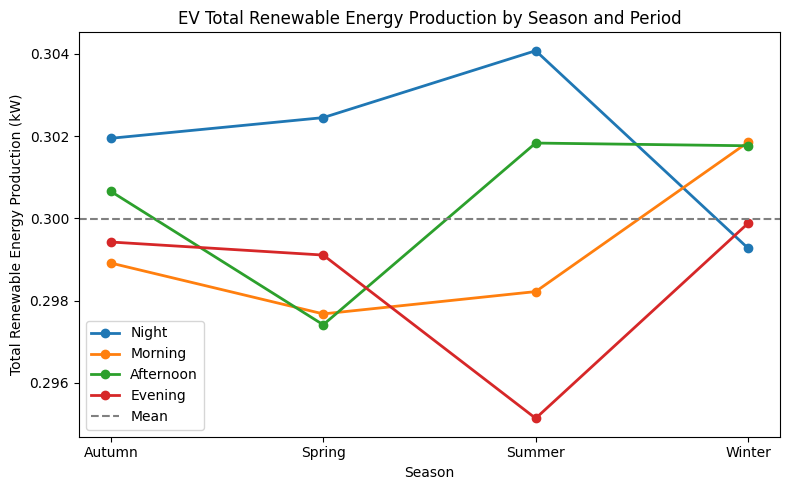

In [27]:
import matplotlib.pyplot as plt

# List of seasons to plot
season = ['Winter', 'Spring', 'Summer', 'Autumn']
mean_value = df_season['Total Renewable Energy Production (kW)'].mean()
# Create a single plot
plt.figure(figsize=(8, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_season[df_season['Day Period'] == i]
    plt.plot(
        condition_df['Season'], 
        condition_df['Total Renewable Energy Production (kW)'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Add a horizontal mean line
plt.axhline(mean_value, color='gray', linestyle='--', linewidth=1.5, label='Mean')

# Chart formatting
plt.title('EV Total Renewable Energy Production by Season and Period')
plt.xlabel('Season')
plt.ylabel('Total Renewable Energy Production (kW)')
plt.legend()
plt.tight_layout()
plt.show()